In [1]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot as plt
import os
import cv2
from collections import defaultdict
#from PIL import Image

np.random.seed(123) # for testing

image_folder_path = r'C:\Users\Tasli\Desktop\free-spoken-digit-dataset-master\Spectros'

training_data = []
training_specs = []
testing_specs = []

training_labels = []
testing_labels = []


file_paths = [f for f in os.listdir(image_folder_path) if os.path.isfile(os.path.join(image_folder_path, f)) and '.png' in f]


Using TensorFlow backend.


In [2]:
for file_name in file_paths:
    spec_index = file_name.rsplit("_", 1)[1].rsplit(".", 1)[0]
    label = file_name[0]
    #spectrogram = Image.open(image_folder_path + '/' + file_name)
    #spectrogram = spectrogram.convert('RGB')
    #spectrogram = spectrogram.resize((224,224))
    spectrogram = cv2.imread(os.path.join(image_folder_path,file_name))
    spectrogram = cv2.resize(spectrogram, (224, 224)) 
    spectrogram = np.array(spectrogram)
    if int(spec_index) <= 4:
        testing_specs.append(spectrogram)
        testing_labels.append(label)
    else:
        training_data.append([spectrogram,label])

#shuffle the training data, then add to the lists
import random
random.shuffle(training_data)
for features,label in training_data:
    training_specs.append(features)
    training_labels.append(label)

training_specs = np.array(training_specs)
testing_specs = np.array(testing_specs)
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)


training_specs = training_specs.astype('float32') # convert types to float
testing_specs = testing_specs.astype('float32')
training_specs /= 255 # normalize data to a 0-1 value
testing_specs /= 255




In [3]:
training_labels = np_utils.to_categorical(training_labels, 10) # convert data to categories
testing_labels = np_utils.to_categorical(testing_labels, 10)



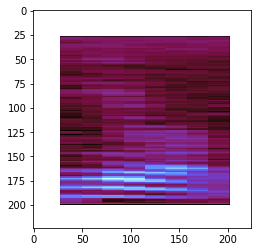

In [4]:
#print(training_specs[1])
plt.imshow(training_specs[29])
plt.show()


In [5]:
import tensorflow

model = tensorflow.keras.applications.mobilenet_v2.MobileNetV2(input_shape=None, alpha=1.0, include_top=True, weights=None, input_tensor=None, pooling=None, classes=10)



#Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Train the model
model.fit(training_specs, training_labels, 
          batch_size=32, nb_epoch=200,validation_split=0.1, verbose=1)



Train on 1620 samples, validate on 180 samples
Epoch 1/200
1620/1620 [==============================] - 36s 22ms/sample - loss: 1.4355 - accuracy: 0.4827 - val_loss: 2.2995 - val_accuracy: 0.1000
Epoch 2/200
1620/1620 [==============================] - 22s 14ms/sample - loss: 0.4662 - accuracy: 0.8340 - val_loss: 2.3045 - val_accuracy: 0.1056
Epoch 3/200
1620/1620 [==============================] - 22s 14ms/sample - loss: 0.2679 - accuracy: 0.9148 - val_loss: 2.3229 - val_accuracy: 0.1000
Epoch 4/200
1620/1620 [==============================] - 22s 14ms/sample - loss: 0.1274 - accuracy: 0.9605 - val_loss: 2.3659 - val_accuracy: 0.1056
Epoch 5/200
1620/1620 [==============================] - 22s 14ms/sample - loss: 0.0590 - accuracy: 0.9840 - val_loss: 2.4211 - val_accuracy: 0.1056
Epoch 6/200
1620/1620 [==============================] - 22s 14ms/sample - loss: 0.0573 - accuracy: 0.9796 - val_loss: 2.5071 - val_accuracy: 0.1056
Epoch 7/200
1620/1620 [==============================] - 22

1620/1620 [==============================] - 23s 14ms/sample - loss: 5.6634e-05 - accuracy: 1.0000 - val_loss: 7.9313 - val_accuracy: 0.1000
Epoch 55/200
1620/1620 [==============================] - 22s 14ms/sample - loss: 5.3665e-05 - accuracy: 1.0000 - val_loss: 8.0501 - val_accuracy: 0.1000
Epoch 56/200
1620/1620 [==============================] - 23s 14ms/sample - loss: 1.4336e-04 - accuracy: 1.0000 - val_loss: 8.1724 - val_accuracy: 0.1000
Epoch 57/200
1620/1620 [==============================] - 23s 14ms/sample - loss: 1.0374e-04 - accuracy: 1.0000 - val_loss: 8.2897 - val_accuracy: 0.1000
Epoch 58/200
1620/1620 [==============================] - 22s 14ms/sample - loss: 2.0009e-04 - accuracy: 1.0000 - val_loss: 8.2280 - val_accuracy: 0.1000
Epoch 59/200
1620/1620 [==============================] - 23s 14ms/sample - loss: 7.9516e-05 - accuracy: 1.0000 - val_loss: 8.3378 - val_accuracy: 0.1000
Epoch 60/200
1620/1620 [==============================] - 23s 14ms/sample - loss: 8.5208e

1620/1620 [==============================] - 23s 14ms/sample - loss: 1.1584e-05 - accuracy: 1.0000 - val_loss: 11.7634 - val_accuracy: 0.1000
Epoch 108/200
1620/1620 [==============================] - 23s 14ms/sample - loss: 1.1971e-05 - accuracy: 1.0000 - val_loss: 11.7873 - val_accuracy: 0.1000
Epoch 109/200
1620/1620 [==============================] - 23s 14ms/sample - loss: 7.9457e-06 - accuracy: 1.0000 - val_loss: 11.5959 - val_accuracy: 0.1000
Epoch 110/200
1620/1620 [==============================] - 23s 14ms/sample - loss: 1.0486e-05 - accuracy: 1.0000 - val_loss: 11.3953 - val_accuracy: 0.1000
Epoch 111/200
1620/1620 [==============================] - 23s 14ms/sample - loss: 1.7528e-05 - accuracy: 1.0000 - val_loss: 11.2091 - val_accuracy: 0.1000
Epoch 112/200
1620/1620 [==============================] - 23s 14ms/sample - loss: 2.2859e-05 - accuracy: 1.0000 - val_loss: 10.9294 - val_accuracy: 0.1000
Epoch 113/200
1620/1620 [==============================] - 23s 14ms/sample - l

Epoch 160/200
1620/1620 [==============================] - 23s 14ms/sample - loss: 4.6469e-05 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 161/200
1620/1620 [==============================] - 23s 14ms/sample - loss: 0.6997 - accuracy: 0.7926 - val_loss: 57.4818 - val_accuracy: 0.1000
Epoch 162/200
1620/1620 [==============================] - 23s 14ms/sample - loss: 0.5960 - accuracy: 0.7858 - val_loss: 66.3640 - val_accuracy: 0.1000
Epoch 163/200
1620/1620 [==============================] - 23s 14ms/sample - loss: 0.1986 - accuracy: 0.9383 - val_loss: 67.6549 - val_accuracy: 0.1000
Epoch 164/200
1620/1620 [==============================] - 23s 14ms/sample - loss: 0.1383 - accuracy: 0.9519 - val_loss: 47.0172 - val_accuracy: 0.0778
Epoch 165/200
1620/1620 [==============================] - 23s 14ms/sample - loss: 0.0980 - accuracy: 0.9722 - val_loss: 56.2544 - val_accuracy: 0.1000
Epoch 166/200
1620/1620 [==============================] - 23s 14ms/sample - loss: 0.

In [6]:
#Test the results
val_loss, val_acc = model.evaluate(testing_specs, testing_labels, verbose=0)

print(val_loss, val_acc)

7.745012290477753 0.515


In [7]:
model.save('200EpochSpokenMobileNet.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: 200EpochSpokenMobileNet.model\assets
